### Data Wrangling and Exploration for Framingham dataset from Kaggle
#### https://www.kaggle.com/captainozlem/framingham-chd-preprocessed-data/version/1

### Import Packages

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.mlab as mlab

#### Load in Data

In [22]:
CHD = pd.read_csv('C:/Users/Mia/OneDrive/Documents/GitHub/Final_Project/Datasets/CHD_preprocessed.csv')

In [23]:
CHD.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [24]:
CHD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   float64
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 516.8 KB


### Correlation Matrix

In [5]:
CHD.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.0,-0.029,0.0047,0.2,0.32,-0.056,-0.0043,0.0037,0.018,-0.073,-0.037,0.056,0.08,-0.12,0.0058,0.084
age,-0.029,1.0,-0.077,-0.21,-0.19,0.14,0.059,0.31,0.1,0.27,0.39,0.21,0.14,-0.0088,0.12,0.23
education,0.0047,-0.077,1.0,-0.014,-0.019,-0.014,-0.028,-0.064,-0.023,-0.011,-0.099,-0.049,-0.1,-0.057,-0.018,-0.027
currentSmoker,0.2,-0.21,-0.014,1.0,0.77,-0.056,-0.034,-0.11,-0.041,-0.047,-0.13,-0.11,-0.16,0.058,-0.054,0.017
cigsPerDay,0.32,-0.19,-0.019,0.77,1.0,-0.051,-0.034,-0.07,-0.036,-0.025,-0.089,-0.055,-0.089,0.073,-0.054,0.053
BPMeds,-0.056,0.14,-0.014,-0.056,-0.051,1.0,0.12,0.27,0.045,0.083,0.27,0.21,0.1,0.019,0.051,0.094
prevalentStroke,-0.0043,0.059,-0.028,-0.034,-0.034,0.12,1.0,0.076,0.0071,0.00017,0.058,0.046,0.026,-0.018,0.018,0.063
prevalentHyp,0.0037,0.31,-0.064,-0.11,-0.07,0.27,0.076,1.0,0.076,0.16,0.7,0.62,0.3,0.15,0.084,0.18
diabetes,0.018,0.1,-0.023,-0.041,-0.036,0.045,0.0071,0.076,1.0,0.041,0.11,0.049,0.082,0.046,0.6,0.098
totChol,-0.073,0.27,-0.011,-0.047,-0.025,0.083,0.00017,0.16,0.041,1.0,0.21,0.17,0.12,0.09,0.048,0.083


### Heat Map

<AxesSubplot:>

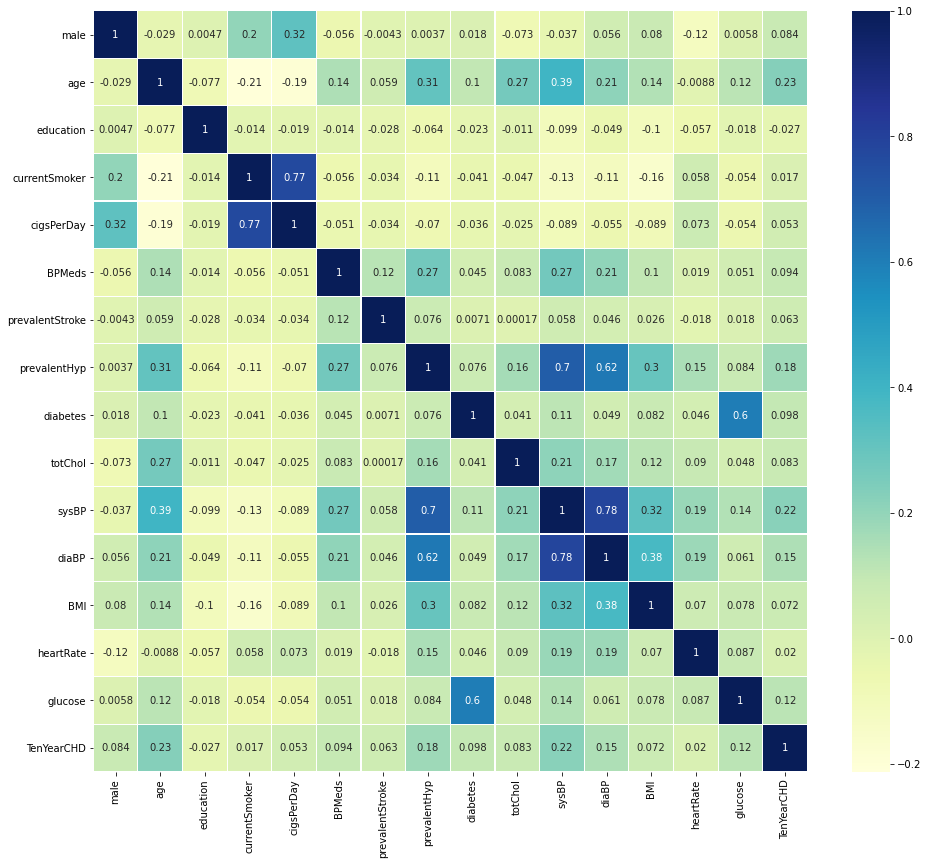

In [6]:
plt.figure(figsize=(16,14))
sns.heatmap(CHD.corr(), cmap ="YlGnBu",linewidths = .1, annot = True)

### Histograms

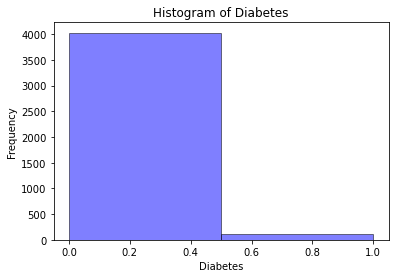

In [9]:
num_bins = 2
n, bins, patches = plt.hist(CHD['diabetes'], num_bins, facecolor='blue', alpha=.5, ec='black')
plt.xlabel('Diabetes')
plt.ylabel('Frequency')
plt.title('Histogram of Diabetes')
plt.show()

#### We can see that very few people actually had diabetes in this study

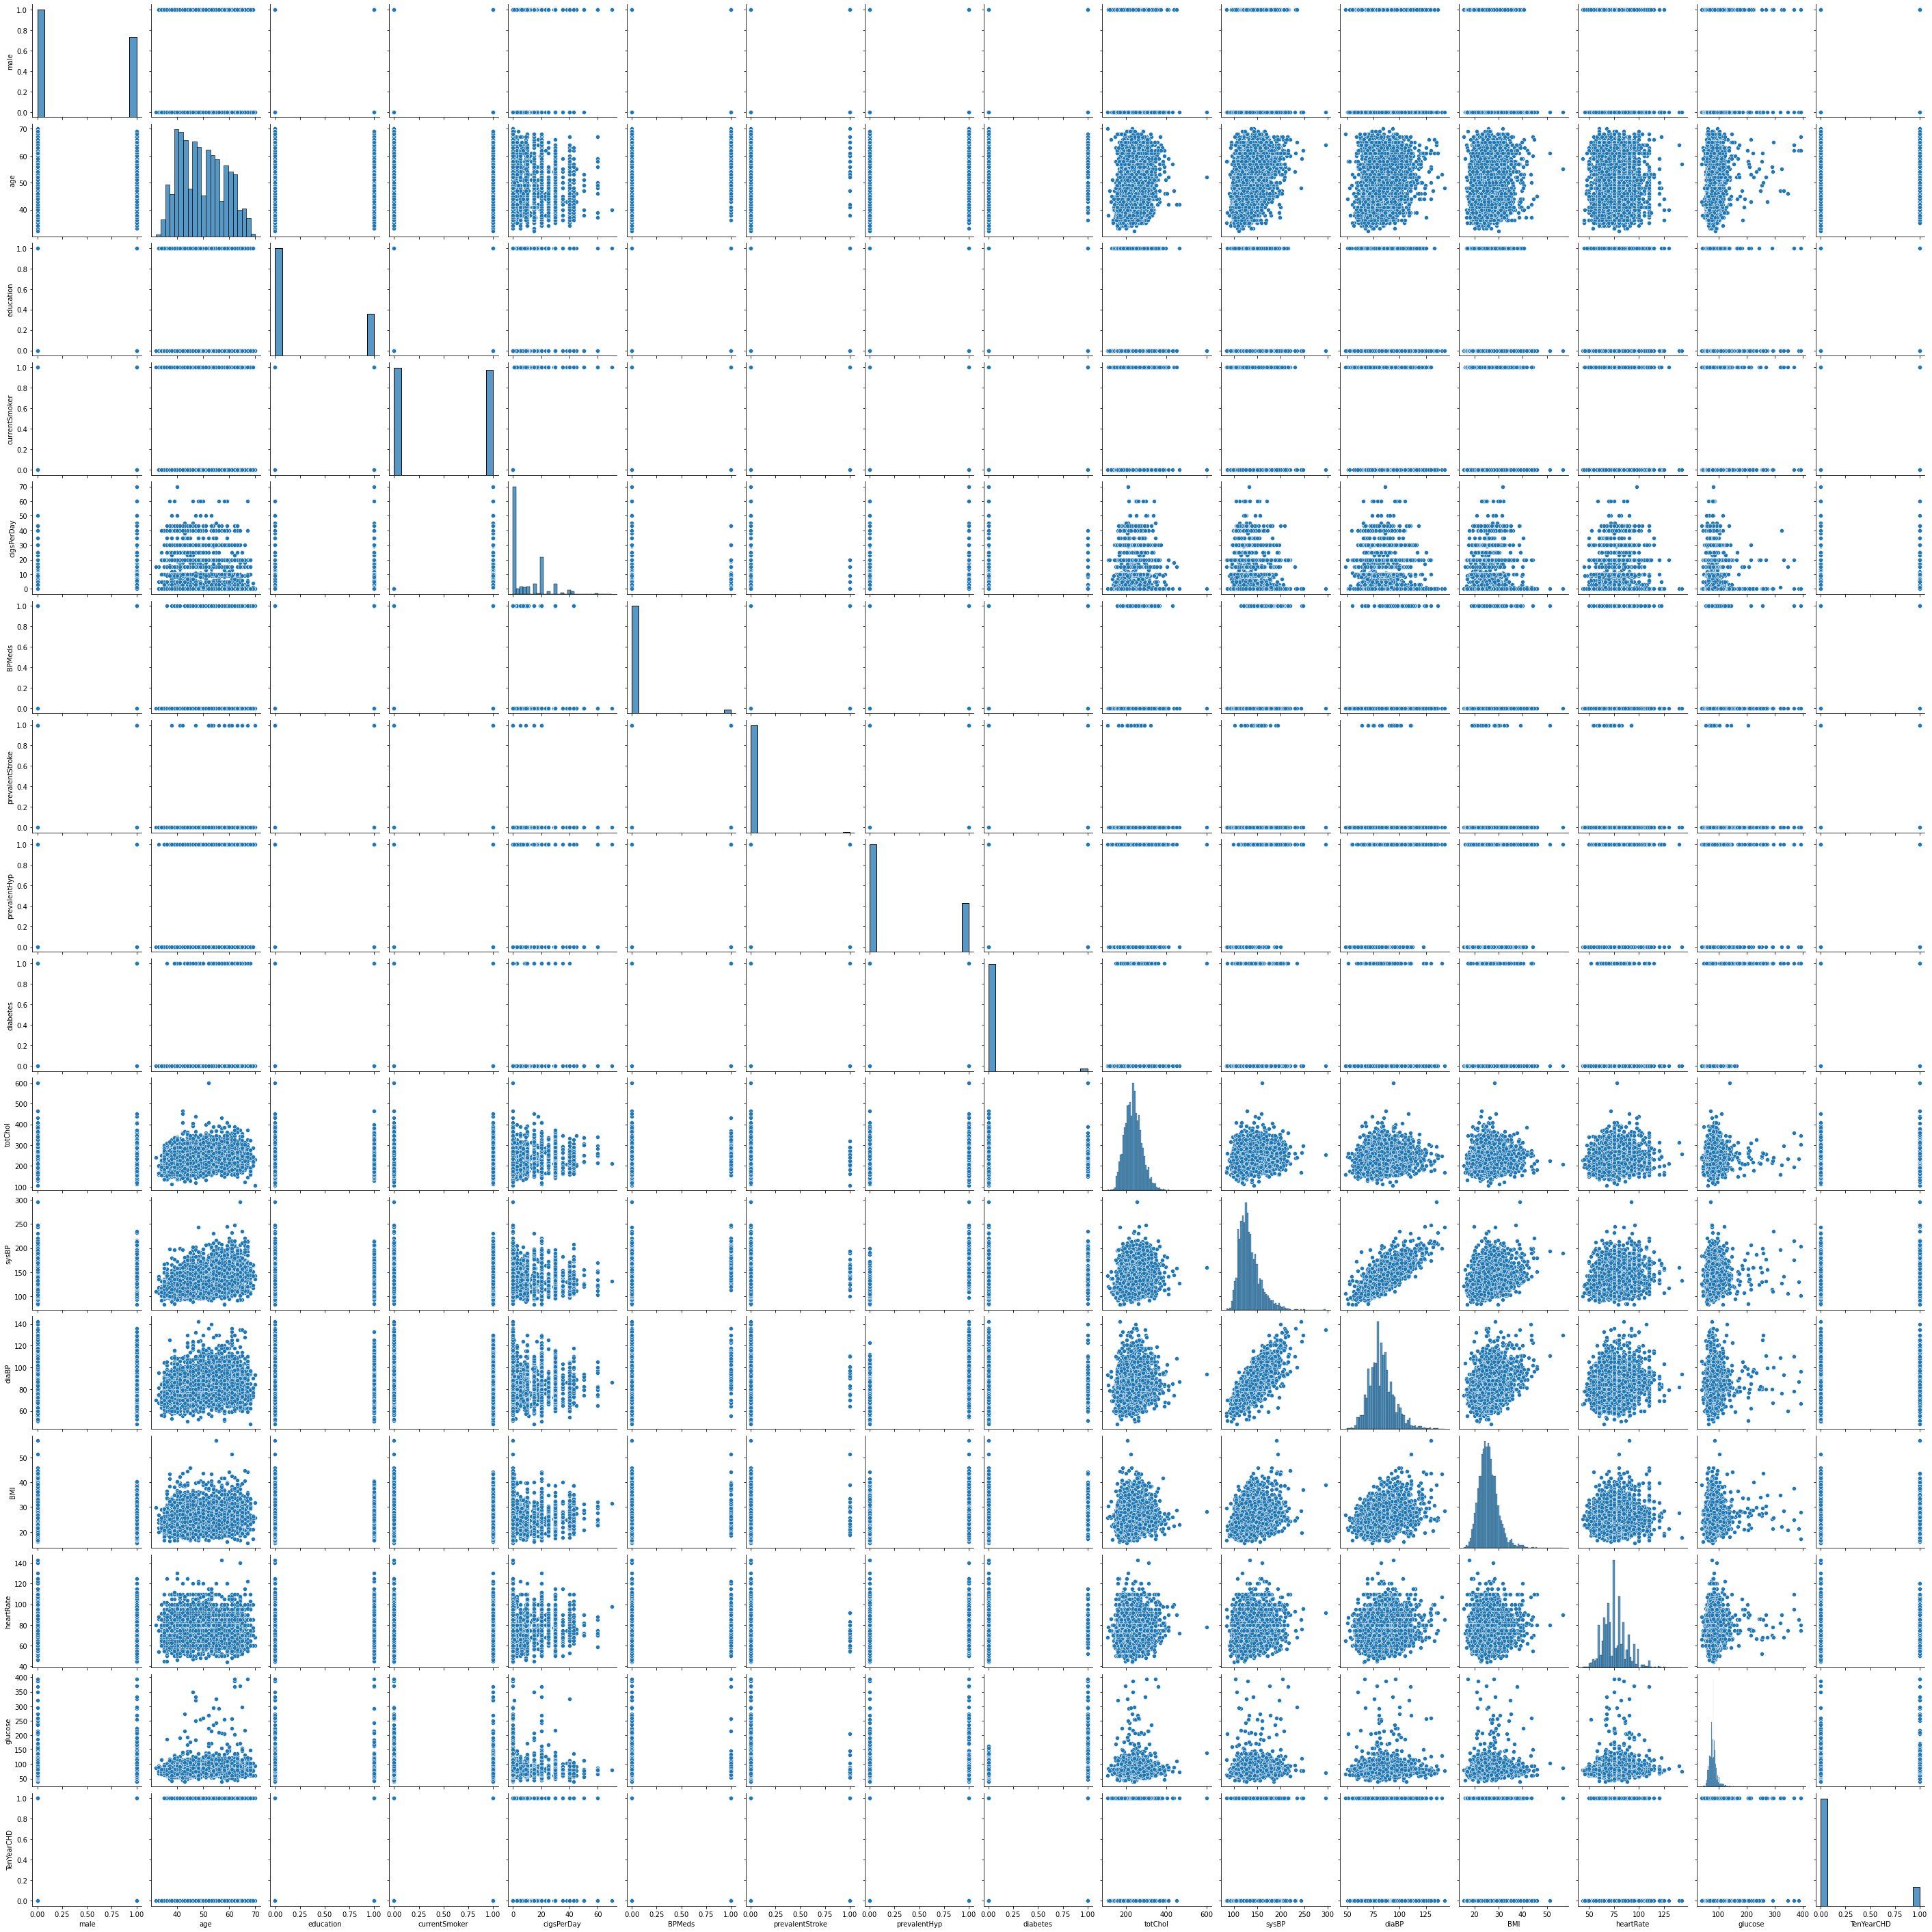

In [8]:
sns.pairplot(CHD)

#### Bar Chart of Current Smoker

Text(0, 0.5, 'Frequency')

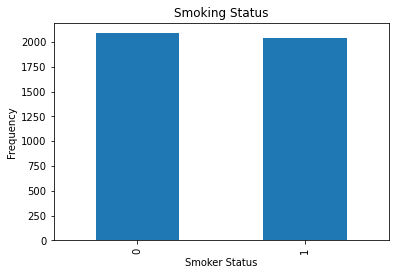

In [11]:
CHD = CHD['currentSmoker'].value_counts().plot(kind='bar')
CHD.set_title("Smoking Status")
CHD.set_xlabel("Smoker Status")
CHD.set_ylabel("Frequency")

#### This study is almost evenly split with smokers and nonsmokers, there are only a little bit more nonsmokers than smokers

#### Scatterplot for BMI and ten year risk of CHD

In [17]:
Plot = CHD.plot.scatter(x='bmi', y='TenYearCHD')
Plot.set_title("BMI and Ten Year CHD risk")
Plot.set_xlabel("BMI")
Plot.set_ylabel("Frequency of Ten Year CHD risk")

AttributeError: 'function' object has no attribute 'scatter'

#### Silvia or Joe, can you see what I am doing wrong here?

#### Preparing for Decision Trees / Random Forest: I want to site that the codes below are from what I learned in our DSO106 Machine Learning Lesson 3, they are not originally my own.

#### Import Packages

In [19]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
CHD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   float64
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 516.8 KB


## Joe or Silvia, I am wondering is it necessary for me to change this data with the code ...as.type(int)? All the columns are already numeric, just has some with float64. I just left it alone. If I am supposed to use that code for each of the float variables can you please let me know? I know that means I have to rerun everything below lol. I think it is ok how i left it, I just need some clarification:)

#### Data Wrangling

In [27]:
x = CHD.drop('TenYearCHD', axis=1)
y = CHD['TenYearCHD']

#### Train Test Split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)


#### Creating initial Decision Tree

In [29]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

#### Assess the Model

In [30]:
treePredictions = decisionTree.predict(x_test)

#### Reading the Confusion Matrix

In [31]:
print(confusion_matrix(y_test, treePredictions))

[[872 187]
 [132  49]]


#### This shows that 872 and 49 were correctly predicted by the model while 132 and 187 were not correctly predicted

### How well does the model fit?

In [32]:
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1059
           1       0.21      0.27      0.24       181

    accuracy                           0.74      1240
   macro avg       0.54      0.55      0.54      1240
weighted avg       0.77      0.74      0.76      1240



#### This shows that the model was 87% accurate in predicting not having ten year risk of heart disease, but only 21% accurate in predicting if someone has a ten year risk of heart disease. And an overall accuracy rate of 77%

### Random Forest

#### Data Wrangling

In [33]:
x = CHD.drop('TenYearCHD', axis=1)
y = CHD['TenYearCHD']

#### Train Test Split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)


#### Preliminary Random Forest

In [35]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

#### Evaluating the Model

In [36]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[1046   13]
 [ 166   15]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1059
           1       0.54      0.08      0.14       181

    accuracy                           0.86      1240
   macro avg       0.70      0.54      0.53      1240
weighted avg       0.82      0.86      0.81      1240



#### Here we see that this model was 86% accurate in predicting not having a ten year risk of heart disease, while having a 54% accuracy of predicing someone does have a ten year risk of heart disease. This model has an overall 82% accuracy rate.

### Hyperparameter Tuning: Number of Estimators

In [37]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.7540322580645161
4 : 0.8387096774193549
5 : 0.8209677419354838
8 : 0.8483870967741935
10 : 0.8508064516129032
20 : 0.8475806451612903
50 : 0.8524193548387097
75 : 0.85
100 : 0.8540322580645161
250 : 0.8548387096774194
500 : 0.8556451612903225


#### Plotting the results:

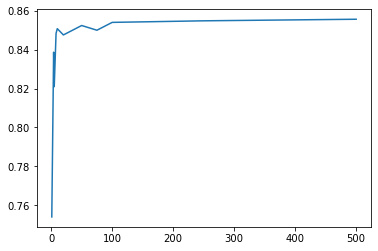

In [38]:
plt.plot(n_estimators_array, results)

## Joe or Silvia, is it correct to see 75 is the number of estimators where it levels off?

#### 75 is number of estimators

In [41]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)
####I am using this code from my DSO106 Machine Learning L3 Page 7-MP

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [44]:
rf = RandomForestClassifier(n_estimators=75)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

#### Fiting the Model

In [45]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=75),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

#### Best Parameters

In [46]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None}

#### Model Details

In [49]:
forest = RandomForestClassifier(n_estimators=75, min_samples_leaf=2, max_features="auto", max_depth=None)
forest.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=75)

#### Random Forest Report

In [50]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[1046   13]
 [ 167   14]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1059
           1       0.52      0.08      0.13       181

    accuracy                           0.85      1240
   macro avg       0.69      0.53      0.53      1240
weighted avg       0.81      0.85      0.81      1240



#### This model shows an 86% accuracy rate of predicting that someone does not have a ten year risk of heart disease, and a 52% accuracy rate for predicing that someone does have a ten year risk of heart disease. The model has an overall accuracy rate of 81%. Not too bad:)

#### Looking at Feature Importance

In [51]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

male               0.026039
age                0.138727
education          0.014341
currentSmoker      0.012719
cigsPerDay         0.049741
BPMeds             0.008969
prevalentStroke    0.003884
prevalentHyp       0.018122
diabetes           0.006067
totChol            0.119480
sysBP              0.141690
diaBP              0.124966
BMI                0.131467
heartRate          0.093945
glucose            0.109844
dtype: float64

#### Sorting results

In [52]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

sysBP              0.141690
age                0.138727
BMI                0.131467
diaBP              0.124966
totChol            0.119480
glucose            0.109844
heartRate          0.093945
cigsPerDay         0.049741
male               0.026039
prevalentHyp       0.018122
education          0.014341
currentSmoker      0.012719
BPMeds             0.008969
diabetes           0.006067
prevalentStroke    0.003884
dtype: float64


#### Plotting the results

<AxesSubplot:>

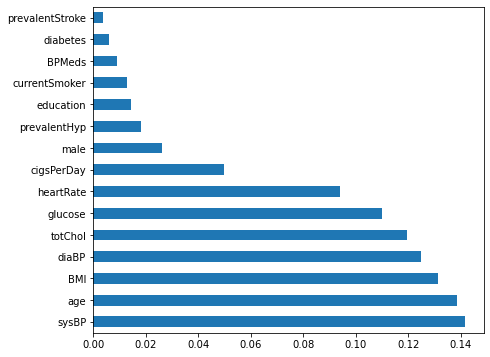

In [53]:
feature_importances.plot(kind='barh', figsize=(7,6))

#### This shows the variables with the most significant influcence on the dependent variable of having a ten year risk of heart disease from the top to the bottom. So systolic blood pressure was the most significant factor, followed by age, BMI, and diastolic blood pressure, total cholesterol, and glucose. We also notice that stroke prevalence is at the bottom of the list which is very interesting.

#### We can see that it is combination of different health metrics that contribute to having a ten year risk of heart disease and not just one single variable. I feel this shows partly why it is the number one killer in the US. There is not just one thing to target to try to keep healthy in the body. Multiple factors lead to this risk. Being aware of all the risk factors should help people try to be mindful of keeping these health metrics in healthy limits as much as they have control over, to help prevent them from experiencing heart disease.

###### I am not a medical doctor, these are simply my thoughts after reviewing the data. If you are concerned about your risk of heart disease, please speak to a licensed medical professional.-MP